In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task-02-car-price-prediction/test_car_details.csv
/kaggle/input/task-02-car-price-prediction/train_car_details.csv


In [2]:
full_train = pd.read_csv("../input/task-02-car-price-prediction/train_car_details.csv")

# Data Analysis

In [3]:
full_train.head(5)

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Hyundai Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
1,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77 kmpl,1248 CC,88.76 bhp,200Nm@ 1750rpm,7.0
2,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62 kmpl,1995 CC,187.74 bhp,400Nm@ 1750-2500rpm,5.0
3,4,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm,7.0
4,5,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.5 kmpl,2982 CC,171 bhp,343Nm@ 1400-3400rpm,7.0


In [4]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689 entries, 0 to 5688
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5689 non-null   int64  
 1   name           5689 non-null   object 
 2   year           5689 non-null   int64  
 3   selling_price  5689 non-null   int64  
 4   km_driven      5689 non-null   int64  
 5   fuel           5689 non-null   object 
 6   seller_type    5689 non-null   object 
 7   transmission   5689 non-null   object 
 8   owner          5689 non-null   object 
 9   mileage        5532 non-null   object 
 10  engine         5532 non-null   object 
 11  max_power      5538 non-null   object 
 12  torque         5531 non-null   object 
 13  seats          5532 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 622.4+ KB


Categorical values is found in object types columns
Also, the target is unsualy at colmumn #3

In [5]:
full_train.describe(include = "all")

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,5689.000000,5689,5689.000000,5.689000e+03,5.689000e+03,5689,5689,5689,5689,5532,5532,5538,5531,5532.000000
unique,NaN,1767,NaN,NaN,NaN,4,3,2,5,366,118,302,402,NaN
top,NaN,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,NaN,92,NaN,NaN,NaN,3082,4756,4963,3685,155,691,265,371,NaN
mean,2845.000000,NaN,2013.741607,6.277744e+05,6.987759e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.422993
std,1642.417172,NaN,4.054875,7.784000e+05,5.124731e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.961395
min,1.000000,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,1423.000000,NaN,2011.000000,2.500000e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,2845.000000,NaN,2014.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,4267.000000,NaN,2017.000000,6.670000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


It's decribed to have some missing values

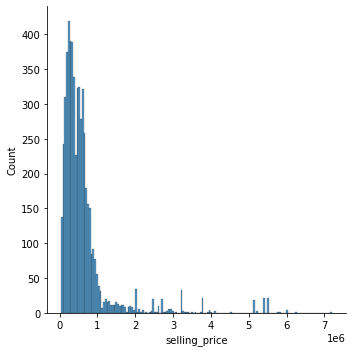

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
#f, ax = plt.subplots(figsize=(16, 16))
sns.displot(full_train.get("selling_price"), kde=False)
plt.show()

# Categorical and missing Values

In [7]:
miliage = []
for item in full_train['mileage']:
    if type(item) == str: # check if contains a value. Not null
        x = item.split('km') # split the string
        miliage.append(float(x[0])) #after the split the numerical values comes first
    else: miliage.append(0) # replace nan value to zero

avg = sum(miliage) / len(miliage)  # replace the zero values (former NaN) to the average. Imputation approach
for i in range(len(miliage)):
    if miliage[i] == 0: miliage[i] = avg

#print(miliage)

full_train = full_train.drop('mileage', 1) # replace the old columns with the proper treated one
df1 = pd.DataFrame (miliage, columns = ['miliage'])
full_train = full_train.join(df1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [8]:
max_power = []  #same code as miliage, however try excepet was neede as there was some values that contains no numerical data
for item in full_train['max_power']:
    if type(item) == str and item != 0:
        x = item.split('b')
        try:
            max_power.append(float(x[0]))
        except: max_power.append(0)
    else: max_power.append(0)


avg = sum(max_power) / len(max_power)
for i in range(len(max_power)):
    if max_power[i] == 0: max_power[i] = avg

#print(max_power)

full_train = full_train.drop('max_power', 1)
df1 = pd.DataFrame (max_power, columns = ['max_power'])
full_train = full_train.join(df1)
full_train.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,torque,seats,miliage,max_power
0,1,Hyundai Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,18.868022,88.708402
1,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,1248 CC,200Nm@ 1750rpm,7.0,20.770000,88.760000
2,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,1995 CC,400Nm@ 1750-2500rpm,5.0,19.620000,187.740000


In [9]:
torque = []
for item in full_train['torque']:
    if type(item) == str and item != 0:
        x = item.split('N')
        try:
            torque.append(float(x[0]))
        except: torque.append(0)
    else: torque.append(0)


avg = sum(torque) / len(torque)
for i in range(len(torque)):
    if torque[i] == 0: torque[i] = avg

#print(torque)

full_train = full_train.drop('torque', 1)
df1 = pd.DataFrame (torque, columns = ['torque'])
full_train = full_train.join(df1)
full_train.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,miliage,max_power,torque
0,1,Hyundai Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,Second Owner,NaN,NaN,18.868022,88.708402,155.773885
1,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,1248 CC,7.0,20.770000,88.760000,200.000000
2,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,1995 CC,5.0,19.620000,187.740000,400.000000


In [10]:
engine = []
for item in full_train['engine']:
    if type(item) == str and item != 0:
        x = item.split('C')
        try:
            engine.append(float(x[0]))
        except: engine.append(0)
    else: engine.append(0)


avg = sum(engine) / len(engine)
for i in range(len(engine)):
    if engine[i] == 0: engine[i] = avg

#print(engine)

full_train = full_train.drop('engine', 1)
df1 = pd.DataFrame (engine, columns = ['engine'])
full_train = full_train.join(df1)
full_train.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,miliage,max_power,torque,engine
0,1,Hyundai Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,Second Owner,NaN,18.868022,88.708402,155.773885,1418.220074
1,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,7.0,20.770000,88.760000,200.000000,1248.000000
2,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,5.0,19.620000,187.740000,400.000000,1995.000000


In [11]:
seats = []
for item in full_train['seats']:
    if item > 0:
        seats.append(item)
    else: seats.append(4)
        
full_train = full_train.drop('seats', 1)
df1 = pd.DataFrame (seats, columns = ['seats'])
full_train = full_train.join(df1)
full_train.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,miliage,max_power,torque,engine,seats
0,1,Hyundai Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,Second Owner,18.868022,88.708402,155.773885,1418.220074,4.0
1,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.770000,88.760000,200.000000,1248.000000,7.0
2,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.620000,187.740000,400.000000,1995.000000,5.0


In [12]:
full_train.isnull().sum()

Id               0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
miliage          0
max_power        0
torque           0
engine           0
seats            0
dtype: int64

# Ordinal Enconder

In [13]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689 entries, 0 to 5688
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5689 non-null   int64  
 1   name           5689 non-null   object 
 2   year           5689 non-null   int64  
 3   selling_price  5689 non-null   int64  
 4   km_driven      5689 non-null   int64  
 5   fuel           5689 non-null   object 
 6   seller_type    5689 non-null   object 
 7   transmission   5689 non-null   object 
 8   owner          5689 non-null   object 
 9   miliage        5689 non-null   float64
 10  max_power      5689 non-null   float64
 11  torque         5689 non-null   float64
 12  engine         5689 non-null   float64
 13  seats          5689 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 622.4+ KB


In [14]:
from sklearn.preprocessing import OrdinalEncoder  #Encoding Categorical data into ordinal numbers

s = (full_train.dtypes == 'object')
object_cols = list(s[s].index)

df = full_train

ordinal_encoder = OrdinalEncoder()
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

df.head(2)

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,miliage,max_power,torque,engine,seats
0,1,489.0,1999,80000,110000,3.0,1.0,1.0,2.0,18.868022,88.708402,155.773885,1418.220074,4.0
1,2,1029.0,2012,459999,87000,1.0,1.0,1.0,0.0,20.770000,88.760000,200.000000,1248.000000,7.0


# Train Test Split

In [15]:
y = df['selling_price']

X_features = ['name','year','km_driven','fuel','transmission','owner','miliage','max_power','torque','engine','seats']
X = df[X_features]

In [16]:
from sklearn.model_selection import train_test_split


trainX, valX, trainy, valy = train_test_split(X, y,
                                              test_size=0.3, 
                                              random_state=12)
valX.shape

(1707, 11)

# Model training

In [17]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(trainX, trainy)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [18]:
y_preds = xgb_reg.predict(valX)
y_preds

array([441196.06, 547016.3 , 138782.7 , ..., 617098.3 , 423867.4 ,
       674866.9 ], dtype=float32)

In [19]:
from sklearn.linear_model import Lasso

lassomodel = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
lassomodel.fit(trainX, trainy)

Lasso(alpha=0.1, positive=True, precompute=True, random_state=42,
      selection='random')

In [20]:
LassoPred = lassomodel.predict(valX)

# PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principalcomponent1', 'principalcomponent2'])
principalDf

,principalcomponent1,principalcomponent2
0,40121.763020,354.823836
1,17122.016219,149.960045
2,32122.642084,68.613144
3,142124.261113,-596.796658
4,55126.491147,-1558.759054
...,...,...
5684,-49878.482630,332.419615
5685,11122.814644,-197.652103
5686,122.182780,51.239362
5687,-12877.831930,46.126468


In [22]:
# PCA Split

PCAtrainX, PCAvalX, PCAtrainy, PCAvaly = train_test_split(principalDf, y,
                                              test_size=0.3, 
                                              random_state=12)

In [23]:
xgb_reg_PCA = xgboost.XGBRegressor()
xgb_reg_PCA.fit(PCAtrainX, PCAtrainy)
PCA_preds = xgb_reg_PCA.predict(PCAvalX)
PCA_preds

array([638832.94, 553128.1 , 216964.33, ..., 776643.8 , 466306.4 ,
       601236.6 ], dtype=float32)

# Metrics

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("XGBoost Mean Absolute Error: " + str(mean_absolute_error(y_preds, valy)))
print("XGBoost R²: " + str(r2_score(y_preds, valy)))

print("Lasso Mean Absolute Error: " + str(mean_absolute_error(LassoPred, valy)))
print("Lasso R²: " + str(r2_score(LassoPred, valy)))

print("XGBoost w/ PCA Mean Absolute Error: " + str(mean_absolute_error(PCA_preds, PCAvaly)))
print("XGBosst w/ PCA R²: " + str(r2_score(PCA_preds, PCAvaly)))

XGBoost Mean Absolute Error: 67789.69672900191
XGBoost R²: 0.9571473085100133
Lasso Mean Absolute Error: 272391.64373776916
Lasso R²: 0.43549134184147054
XGBoost w/ PCA Mean Absolute Error: 194245.18436493116
XGBosst w/ PCA R²: 0.694275589999267


# Complete Model

In [25]:
final_model = xgboost.XGBRegressor()


""""final_model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)  """


final_model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Final test

In [26]:
dftest = pd.read_csv('../input/task-02-car-price-prediction/test_car_details.csv')
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2375 non-null   int64  
 1   name          2375 non-null   object 
 2   year          2375 non-null   int64  
 3   km_driven     2375 non-null   int64  
 4   fuel          2375 non-null   object 
 5   seller_type   2375 non-null   object 
 6   transmission  2375 non-null   object 
 7   owner         2375 non-null   object 
 8   mileage       2375 non-null   object 
 9   engine        2375 non-null   object 
 10  max_power     2375 non-null   object 
 11  torque        2375 non-null   object 
 12  seats         2375 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 241.3+ KB


In [27]:
miliage = []
for item in dftest['mileage']:
    if type(item) == str: # check if contains a value. Not null
        x = item.split('km') # split the string
        miliage.append(float(x[0])) #after the split the numerical values comes first
    else: miliage.append(0) # replace nan value to zero

avg = sum(miliage) / len(miliage)  # replace the zero values (former NaN) to the average. Imputation approach
for i in range(len(miliage)):
    if miliage[i] == 0: miliage[i] = avg
        
max_power = []  #same code as miliage, however try excepet was neede as there was some values that contains no numerical data
for item in dftest['max_power']:
    if type(item) == str and item != 0:
        x = item.split('b')
        try:
            max_power.append(float(x[0]))
        except: max_power.append(0)
    else: max_power.append(0)


avg = sum(max_power) / len(max_power)
for i in range(len(max_power)):
    if max_power[i] == 0: max_power[i] = avg
        
torque = []
for item in dftest['torque']:
    if type(item) == str and item != 0:
        x = item.split('N')
        try:
            torque.append(float(x[0]))
        except: torque.append(0)
    else: torque.append(0)


avg = sum(torque) / len(torque)
for i in range(len(torque)):
    if torque[i] == 0: torque[i] = avg
        
engine = []
for item in dftest['engine']:
    if type(item) == str and item != 0:
        x = item.split('C')
        try:
            engine.append(float(x[0]))
        except: engine.append(0)
    else: engine.append(0)


avg = sum(engine) / len(engine)
for i in range(len(engine)):
    if engine[i] == 0: engine[i] = avg
        
dftest = dftest.drop(['mileage', 'max_power', 'torque', 'engine'], 1)
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2375 non-null   int64  
 1   name          2375 non-null   object 
 2   year          2375 non-null   int64  
 3   km_driven     2375 non-null   int64  
 4   fuel          2375 non-null   object 
 5   seller_type   2375 non-null   object 
 6   transmission  2375 non-null   object 
 7   owner         2375 non-null   object 
 8   seats         2375 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 167.1+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [28]:
df1 = pd.DataFrame (miliage, columns = ['miliage'])
dftest = dftest.join(df1)
df1 = pd.DataFrame (max_power, columns = ['max_power'])
dftest = dftest.join(df1)
df1 = pd.DataFrame (torque, columns = ['torque'])
dftest = dftest.join(df1)
df1 = pd.DataFrame (engine, columns = ['engine'])
dftest = dftest.join(df1)
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2375 non-null   int64  
 1   name          2375 non-null   object 
 2   year          2375 non-null   int64  
 3   km_driven     2375 non-null   int64  
 4   fuel          2375 non-null   object 
 5   seller_type   2375 non-null   object 
 6   transmission  2375 non-null   object 
 7   owner         2375 non-null   object 
 8   seats         2375 non-null   float64
 9   miliage       2375 non-null   float64
 10  max_power     2375 non-null   float64
 11  torque        2375 non-null   float64
 12  engine        2375 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 241.3+ KB


In [29]:
s = (dftest.dtypes == 'object')
object_cols = list(s[s].index)


ordinal_encoder = OrdinalEncoder()
dftest[object_cols] = ordinal_encoder.fit_transform(dftest[object_cols])
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2375 non-null   int64  
 1   name          2375 non-null   float64
 2   year          2375 non-null   int64  
 3   km_driven     2375 non-null   int64  
 4   fuel          2375 non-null   float64
 5   seller_type   2375 non-null   float64
 6   transmission  2375 non-null   float64
 7   owner         2375 non-null   float64
 8   seats         2375 non-null   float64
 9   miliage       2375 non-null   float64
 10  max_power     2375 non-null   float64
 11  torque        2375 non-null   float64
 12  engine        2375 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 241.3 KB


In [30]:
X_test = dftest[X_features]
X_test

,name,year,km_driven,fuel,transmission,owner,miliage,max_power,torque,engine,seats
0,892.0,2008,60000,1.0,1.0,4.0,17.00,70.00,162.317583,1405.0,5.0
1,572.0,2019,30000,3.0,1.0,0.0,21.40,83.10,115.000000,1197.0,5.0
2,662.0,2017,80000,1.0,0.0,0.0,28.40,74.02,190.000000,1248.0,5.0
3,520.0,2018,30000,1.0,1.0,0.0,16.00,140.00,330.000000,2179.0,7.0
4,258.0,2019,35000,3.0,1.0,0.0,18.60,81.86,162.317583,1197.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2370,1055.0,2011,125000,1.0,1.0,1.0,20.54,103.60,250.000000,1598.0,5.0
2371,242.0,2016,79000,1.0,1.0,0.0,19.67,126.20,259.900000,1582.0,5.0
2372,97.0,2017,45000,1.0,1.0,0.0,23.00,98.96,205.000000,1498.0,5.0
2373,993.0,2016,52000,1.0,0.0,0.0,12.55,168.50,360.000000,2982.0,7.0


In [31]:
preds = final_model.predict(X_test)
preds

array([ 163052.11,  591371.9 ,  691252.25, ...,  706533.06, 2063221.  ,
        759297.4 ], dtype=float32)

In [32]:
preds = pd.DataFrame(preds, columns = ['selling_price'])
dftest = dftest.join(preds)
dftest

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,seats,miliage,max_power,torque,engine,selling_price
0,1,892.0,2008,60000,1.0,1.0,1.0,4.0,5.0,17.00,70.00,162.317583,1405.0,1.630521e+05
1,2,572.0,2019,30000,3.0,1.0,1.0,0.0,5.0,21.40,83.10,115.000000,1197.0,5.913719e+05
2,3,662.0,2017,80000,1.0,1.0,0.0,0.0,5.0,28.40,74.02,190.000000,1248.0,6.912522e+05
3,4,520.0,2018,30000,1.0,1.0,1.0,0.0,7.0,16.00,140.00,330.000000,2179.0,1.340319e+06
4,5,258.0,2019,35000,3.0,1.0,1.0,0.0,5.0,18.60,81.86,162.317583,1197.0,5.571210e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,2371,1055.0,2011,125000,1.0,1.0,1.0,1.0,5.0,20.54,103.60,250.000000,1598.0,2.926439e+05
2371,2372,242.0,2016,79000,1.0,0.0,1.0,0.0,5.0,19.67,126.20,259.900000,1582.0,8.022340e+05
2372,2373,97.0,2017,45000,1.0,1.0,1.0,0.0,5.0,23.00,98.96,205.000000,1498.0,7.065331e+05
2373,2374,993.0,2016,52000,1.0,0.0,0.0,0.0,7.0,12.55,168.50,360.000000,2982.0,2.063221e+06


In [33]:
submit = dftest[['Id', 'selling_price']]
submit.to_csv('/kaggle/working/submission.csv', index=False)

In [34]:
submit

,Id,selling_price
0,1,1.630521e+05
1,2,5.913719e+05
2,3,6.912522e+05
3,4,1.340319e+06
4,5,5.571210e+05
...,...,...
2370,2371,2.926439e+05
2371,2372,8.022340e+05
2372,2373,7.065331e+05
2373,2374,2.063221e+06
